In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Loading
X = np.genfromtxt( 'data/X_train.txt' , delimiter=None)
Y = np.genfromtxt( 'data/Y_train.txt' , delimiter=None)
X,Y = ml.shuffleData(X,Y)

print ("Actual Dataset Shape", X.shape)
print ("Min Max Mean Variance")
#print (np.mean(X.T, axis=1))
for feature in range(X.shape[1]):
    print ("Feature {}".format(feature), np.min(X[:,feature]), np.max(X[:,feature]), 
           np.mean(X[:,feature]), np.var(X[:,feature]))

Actual Dataset Shape (200000, 14)
Min Max Mean Variance
Feature 0 193.5 253.0 241.6011037 83.4991711498
Feature 1 152.5 249.0 227.3765713 92.625593125
Feature 2 214.25 252.5 241.5541505 35.2863398033
Feature 3 152.5 252.5 232.82676815 97.6257317486
Feature 4 10.0 31048.0 3089.923365 15651513.7564
Feature 5 0.0 13630.0 928.25902 3081761.81695
Feature 6 0.0 9238.0 138.09383 443951.746446
Feature 7 0.0 125.17 3.2485793303 8.21948502491
Feature 8 0.87589 19.167 6.49865290275 6.40504819136
Feature 9 0.0 13.23 2.09713912048 4.36344047061
Feature 10 0.0 66.761 4.21766040935 4.08637188423
Feature 11 0.0 73.902 2.69171845215 2.19877847436
Feature 12 0.99049 975.04 10.2715904759 404.646245041
Feature 13 -999.9 797.2 5.7814805 3406.52055098


In [2]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
# subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt)
# Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

print ("Rescaled Dataset Shape", XtS.shape)
print ("Min Max Mean Variance")
#print (np.mean(X.T, axis=1))
for feature in range(XtS.shape[1]):
    print ("Feature {}".format(feature), np.min(XtS[:,feature]), np.max(XtS[:,feature]), 
           np.mean(XtS[:,feature]), np.var(XtS[:,feature]))

Rescaled Dataset Shape (5000, 14)
Min Max Mean Variance
Feature 0 -4.64853518302 1.25816414779 -5.7980287238e-15 1.0
Feature 1 -3.84584746775 2.2320173613 -2.56363819062e-15 1.0
Feature 2 -4.37010272144 1.82966942187 8.05613353805e-14 1.0
Feature 3 -2.75079808832 1.9843719886 -1.02160413462e-13 1.0
Feature 4 -0.763247930851 6.75249270102 3.12638803734e-17 1.0
Feature 5 -0.520742300389 6.9827220894 3.5527136788e-19 1.0
Feature 6 -0.209177814066 13.7443474673 8.52651282912e-18 1.0
Feature 7 -1.136954696 8.6964630604 1.44666501001e-15 1.0
Feature 8 -2.18373193175 4.06924608101 -7.7591266745e-16 1.0
Feature 9 -0.997452379031 4.37666644282 1.2875034372e-15 1.0
Feature 10 -2.05064162861 6.61461186322 -3.76871867047e-15 1.0
Feature 11 -1.92230333349 8.72645508832 -3.42765815731e-15 1.0
Feature 12 -0.680304975357 18.1031275906 -1.38840050568e-15 1.0
Feature 13 -18.7620255413 13.6880250842 1.42108547152e-16 1.0


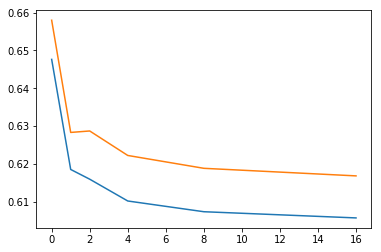

In [16]:
learner = ml.linearC.linearClassify()
regs = [0.0, 1.0, 2.0, 4.0, 8.0, 16.0]
trAucs = []
vaAucs = []
for reg in regs:
    learner.train(XtS, Yt, reg=reg, initStep=0.1, stopTol=1e-7, stopIter=300)
    trAucs.append(learner.auc(XtS, Yt)) # train AUC
    vaAucs.append(learner.auc(XvS, Yva)) # train AUC
plt.plot(regs, trAucs, regs, vaAucs)
plt.show()

Dataset Shape With Polynomial Features  (5000, 28)


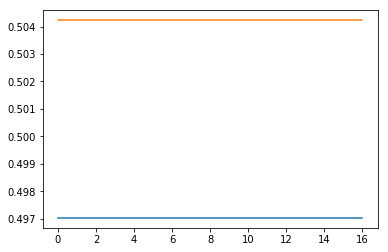

In [18]:
Xtn = Xt[:,:]
Xvn = Xva[:,:]
for feature in range(XtS.shape[1]):
    Xtn = np.hstack((Xtn, (Xt[:,feature]**2).reshape(Xtn.shape[0],1)))
    Xvn = np.hstack((Xvn, (Xva[:,feature]**2).reshape(Xvn.shape[0],1)))

print ("Dataset Shape With Polynomial Features ", Xtn.shape)    

regs = [0.0, 1.0, 2.0, 4.0, 8.0, 16.0]
trAucs = []
vaAucs = []
for reg in regs:
    learner.train(Xtn, Yt, reg=reg, initStep=0.1, stopTol=1e-8, stopIter=500)
    trAucs.append(learner.auc(Xtn, Yt)) # train AUC
    vaAucs.append(learner.auc(Xvn, Yva)) # train AUC

plt.plot(regs, trAucs, regs, vaAucs)
plt.show()

Both the Training error and validation error are not changing with increasing regularisation, the reason being that after adding polynomial features the number of features is larger.

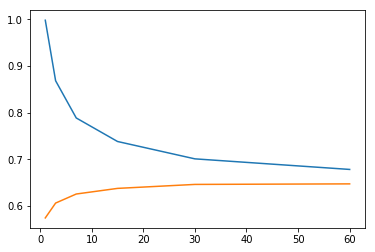

In [5]:
learner = ml.knn.knnClassify()
Ks = [1, 3, 7, 15, 30, 60]
trAucs = []
vaAucs = []
for k in Ks:
    learner.train(XtS, Yt, K=k, alpha=0.0)
    trAucs.append(learner.auc(XtS, Yt)) # train AUC
    vaAucs.append(learner.auc(XvS, Yva)) # validation AUC
plt.plot(Ks, trAucs, Ks, vaAucs)
plt.show()

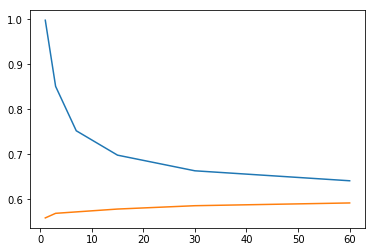

In [6]:
learner = ml.knn.knnClassify()
Ks = [1, 3, 7, 15, 30, 60]
trAucs = []
vaAucs = []
for k in Ks:
    learner.train(Xt, Yt, K=k, alpha=0.0)
    trAucs.append(learner.auc(Xt, Yt)) # train AUC
    vaAucs.append(learner.auc(Xva, Yva)) # validation AUC
plt.plot(Ks, trAucs, Ks, vaAucs)
plt.show()

Training Error


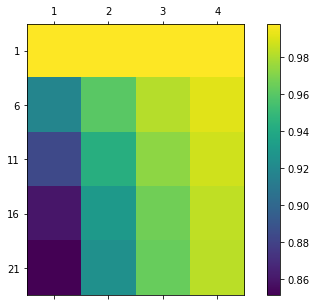

Validation Error


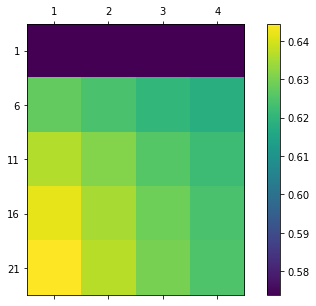

In [7]:
learner = ml.knn.knnClassify()
K = range(1, 25, 5) # Or something else
A = range(1, 5, 1) # Or something else
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt) # train learner using k and a
        va_auc[i][j] = learner.auc(XvS, Yva)

# Now plot it
print ("Training Error")
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation= 'nearest' )
f.colorbar(cax)
ax.set_xticklabels([ '' ]+list(A))
ax.set_yticklabels([ '' ]+list(K))
plt.show()

print ("Validation Error")
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation= 'nearest' )
f.colorbar(cax)
ax.set_xticklabels([ '' ]+list(A))
ax.set_yticklabels([ '' ]+list(K))
plt.show()

The best value of K seems to be around 15 and the best value of alpha seems to be 3

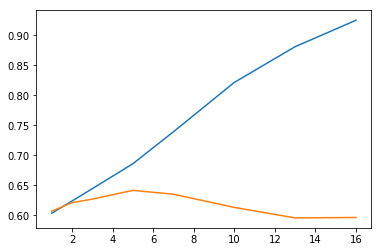

In [8]:
learner = ml.dtree.treeClassify()
depths = [1, 2, 3, 5, 7, 10, 13, 16]
trAucs = []
vaAucs = []
numNodesWithDepth = []
for depth in depths:
    learner.train(XtS, Yt, maxDepth=depth)
    trAucs.append(learner.auc(XtS, Yt)) # train AUC
    vaAucs.append(learner.auc(XvS, Yva)) # train AUC
    numNodesWithDepth.append(learner.sz)
    
plt.plot(depths, trAucs, depths, vaAucs)
plt.show()

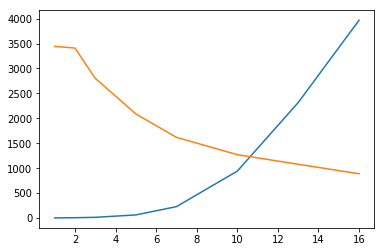

In [9]:
learner = ml.dtree.treeClassify()
parents = [1, 2, 3, 5, 7, 10, 13, 16]
trAucs = []
vaAucs = []
numNodesWithParent = []
for parent in parents:
    learner.train(XtS, Yt, minParent=parent, maxDepth=15)
    numNodesWithParent.append(learner.sz)

plt.plot(depths, numNodesWithDepth, parents, numNodesWithParent)
plt.show()

Training Error


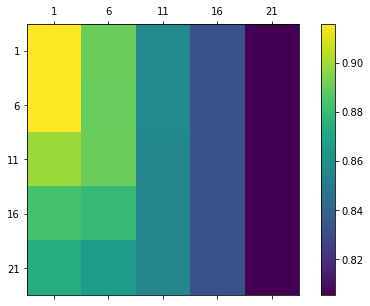

Validation Error


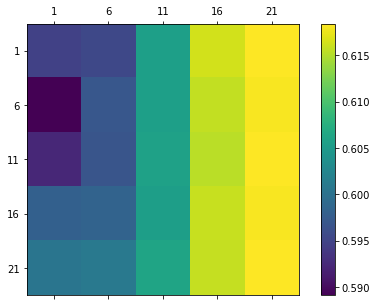

In [10]:
learner = ml.dtree.treeClassify()
parents = range(1,25,5) # Or something else
leafs = range(1,25,5) # Or something else
tr_auc = np.zeros((len(parents),len(leafs)))
va_auc = np.zeros((len(parents),len(leafs)))
for i,p in enumerate(parents):
    for j,l in enumerate(leafs):
        learner.train(XtS, Yt, minParent=p, minLeaf=l, maxDepth=15)
        tr_auc[i][j] = learner.auc(XtS, Yt) # train learner using k and a
        va_auc[i][j] = learner.auc(XvS, Yva)

# Now plot it
print ("Training Error")
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation= 'nearest' )
f.colorbar(cax)
ax.set_xticklabels([ '' ]+list(leafs))
ax.set_yticklabels([ '' ]+list(parents))
plt.show()

print ("Validation Error")
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation= 'nearest' )
f.colorbar(cax)
ax.set_xticklabels([ '' ]+list(leafs))
ax.set_yticklabels([ '' ]+list(parents))
plt.show()

The best value of min parent seems to be 15, The best value of min leaf seems to be around 20.

Training Error


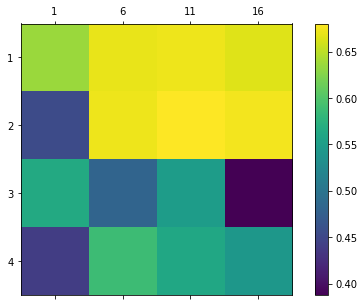

Validation Error


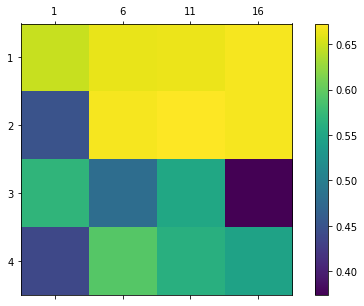

In [11]:
nodes = range(1, 20, 5) # Or something else
layers = range(1, 5, 1) # Or something else
tr_auc = np.zeros((len(layers),len(nodes)))
va_auc = np.zeros((len(layers),len(nodes)))

for i, l in enumerate(layers):
    for j, n in enumerate(nodes):
        nn = ml.nnet.nnetClassify()
        nn.init_weights([XtS.shape[1]]+[n]*l+[2], 'random' , XtS, Yt) # as many layers nodes you want
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt) # train learner using k and a
        va_auc[i][j] = nn.auc(XvS, Yva)

# Now plot it
print ("Training Error")
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation= 'nearest' )
f.colorbar(cax)
ax.set_xticklabels([ '' ]+list(nodes))
ax.set_yticklabels([ '' ]+list(layers))
plt.show()

print ("Validation Error")
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation= 'nearest' )
f.colorbar(cax)
ax.set_xticklabels([ '' ]+list(nodes))
ax.set_yticklabels([ '' ]+list(layers))
plt.show()

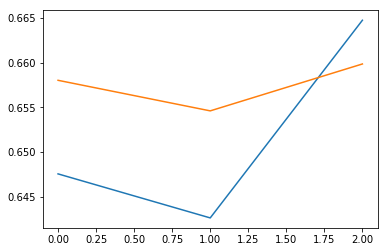

In [12]:
tr_auc = np.zeros(3)
va_auc = np.zeros(3)

sig = lambda z: np.atleast_2d(z)
dsig = lambda z: np.atleast_2d(1)
nn = ml.nnet.nnetClassify()
nn.setActivation( 'custom' , sig, dsig)

nn.init_weights([XtS.shape[1], 5, 2], 'random' , XtS, Yt) # as many layers nodes you want
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)

tr_auc[0] = nn.auc(XtS, Yt) # train learner using k and a
va_auc[0]= nn.auc(XvS, Yva)

logis = lambda z: 1.0/(1.0+np.exp(-z))
dlogis = lambda z: logis(z)*(1-logis(z))
nn = ml.nnet.nnetClassify()
nn.setActivation( 'custom' , logis, dlogis)

nn.init_weights([XtS.shape[1], 5, 2], 'random' , XtS, Yt) # as many layers nodes you want
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)

tr_auc[1] = nn.auc(XtS, Yt) # train learner using k and a
va_auc[1]= nn.auc(XvS, Yva)

htan = lambda z: (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
dhtan = lambda z: 4.0/((np.exp(z)+np.exp(-z))**2)
nn = ml.nnet.nnetClassify()
nn.setActivation( 'custom' , htan, dhtan)

nn.init_weights([XtS.shape[1], 5, 2], 'random' , XtS, Yt) # as many layers nodes you want
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)

tr_auc[2] = nn.auc(XtS, Yt) # train learner using k and a
va_auc[2]= nn.auc(XvS, Yva)

plt.plot(range(3), tr_auc, range(3), va_auc)
plt.show()

The function seems to perform better than the logistic function but worse than the htangent function

In [31]:
Xte = np.genfromtxt( 'data/X_test.txt' , delimiter=None)
Xtf, Ytf = Xtr[:], Ytr[:]
XtfS, params = ml.rescale(Xtf)
learner = ml.dtree.treeClassify()
learner.train(Xtr, Ytr, minParent=15, minLeaf=20, maxDepth=20)
print (learner.auc(Xva, Yva))
print (learner.auc(Xtr, Ytr))
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt( 'Y_submit.txt' , Yte, '%d, %.2f' , header= 'ID,Prob1' , comments= '' , delimiter= ',' )

0.713932466027
0.835245345391


Kaggle User Name : Peeyush , AUC 0.76914

Statement of Collabration : This work is done by me(Peeyush Gupta).

In [1]:
# Random Forests

import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Loading
X = np.genfromtxt( 'data/X_train.txt' , delimiter=None)
Y = np.genfromtxt( 'data/Y_train.txt' , delimiter=None)
X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
from sklearn.metrics import roc_auc_score

Xt, Yt = Xtr[:25000], Ytr[:25000]

clf = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=0)
clf.fit(Xtr, Ytr)

estimators = [ 75, 100]
for estimator in estimators:
    clf = RandomForestClassifier(n_estimators=estimator, max_depth=20, random_state=0)
    clf.fit(Xtr, Ytr)

    y_true = Yva
    y_scores = clf.predict_proba(Xva)

    print (roc_auc_score(y_true, y_scores[:,1]))

    y_true = Ytr
    y_scores = clf.predict_proba(Xtr)

    print(roc_auc_score(y_true, y_scores[:,1]))
    
    print(estimator)

0.776488469971
0.963480251054
75
0.776917895531
0.963888031759
100


In [24]:
Xte = np.genfromtxt( 'data/X_test.txt' , delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), clf.predict_proba(Xte)[:,1])).T

np.savetxt( 'Y_submit.txt' , Yte, '%d, %.2f' , header= 'ID,Prob1' , comments= '' , delimiter= ',' )